In [5]:
# PREPARING AND EXPLORING THE DATASET
# 1.2 Initial Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')

# Parse datetime
df['date'] = pd.to_datetime(df[['year','month','day','hour']])
df.set_index('date', inplace=True)

# Summary statistics
summary = df[['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].describe()
print(summary)
df.drop('cbwd', axis=1)

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654     23.889140   
std       92.050387     14.433440     12.198613     10.268698     50.010635   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      137.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

                 Is            Ir  
count  43824.000000  43824.000000  
mean       0.052734      0.194916  
std        0.760375      1.415867  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
date,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0
2014-12-31 20:00:00,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0
2014-12-31 21:00:00,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0


In [ ]:
# 1.2.3 Time Series Plot

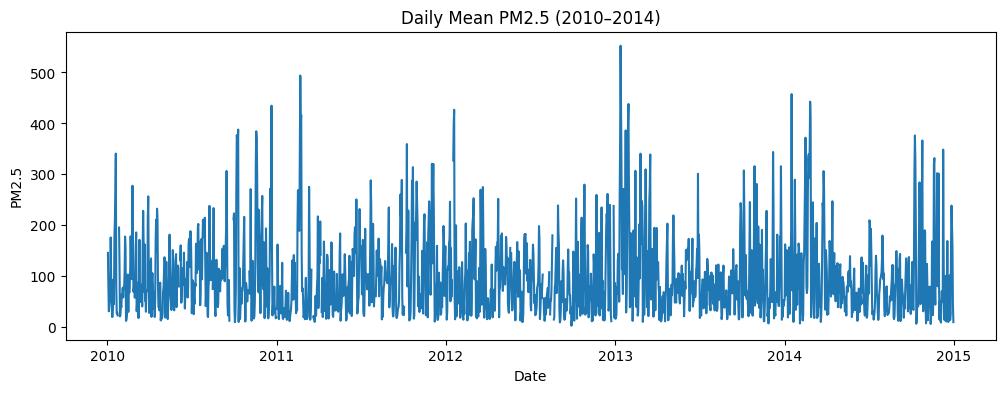

In [ ]:
# Time series plot of target
plt.figure(figsize=(12,4))
plt.plot(df['pm2.5'].resample('D').mean())
plt.title('Daily Mean PM2.5 (2010–2014)')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()

In [ ]:
#1.2.5 Histogram of Pm2.5

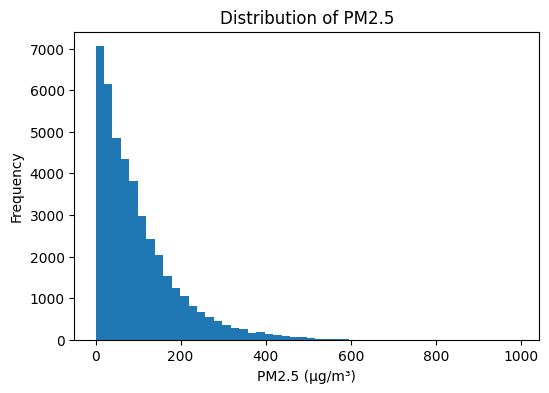

In [ ]:
# Histogram of pm2.5
plt.figure(figsize=(6,4))
plt.hist(df['pm2.5'].dropna(), bins=50)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')

# Parse datetime
df['date'] = pd.to_datetime(df[['year','month','day','hour']])
df.set_index('date', inplace=True)

# Display the number of missing values in each column
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values in numerical columns with the mean
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

In [ ]:
# Select only numerical columns for quantile calculation and clipping
df_numeric = df.select_dtypes(include=['number'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Apply clipping only to numerical columns
df[df_numeric.columns] = df_numeric.clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR, axis=1)
df
df.drop('cbwd', axis=1)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,dow,season,pm_lag1,pm_roll7h
2010-01-01 06:00:00,7,2010,1,1,6,98.613215,-1.442659,-1.758918,0.053821,0.261091,0,0,4,Winter,0.053292,0.056031
2010-01-01 07:00:00,8,2010,1,1,7,98.613215,-1.442659,-1.758918,0.053821,0.363074,0,0,4,Winter,0.053292,0.056031
2010-01-01 08:00:00,9,2010,1,1,8,98.613215,-1.442659,-1.758918,0.053821,0.541401,0,0,4,Winter,0.053292,0.056031
2010-01-01 09:00:00,10,2010,1,1,9,98.613215,-1.511950,-1.676924,0.053821,0.719727,0,0,4,Winter,0.053292,0.056031
2010-01-01 10:00:00,11,2010,1,1,10,98.613215,-1.442659,-1.594930,0.053821,0.948761,0,0,4,Winter,0.053292,0.056031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.000000,-1.719822,-1.184961,1.709251,2.133238,0,0,2,Winter,-1.102151,-1.167853
2014-12-31 20:00:00,43821,2014,12,31,20,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,-1.128230,-1.169813
2014-12-31 21:00:00,43822,2014,12,31,21,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,-1.102151,-1.167853
2014-12-31 22:00:00,43823,2014,12,31,22,8.000000,-1.650531,-1.348948,1.709251,2.133238,0,0,2,Winter,-1.102151,-1.173734


In [ ]:
# Feature engineering

In [ ]:
# Create a datetime index from existing columns
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Feature engineering
df['dow']    = df.index.dayofweek
df['month']  = df.index.month # Re-extract month from the new datetime index
df['season'] = pd.cut(df['month'],
                      bins=[0,2,5,8,11,12],
                      labels=['Winter','Spring','Summer','Autumn','Winter'],
                      right=True,
                      ordered=False)
df
df.drop('cbwd', axis=1)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,dow,season,pm_lag1,pm_roll7h
2010-01-01 06:00:00,7,2010,1,1,6,98.613215,-1.442659,-1.758918,0.053821,0.261091,0,0,4,Winter,0.053292,0.056031
2010-01-01 07:00:00,8,2010,1,1,7,98.613215,-1.442659,-1.758918,0.053821,0.363074,0,0,4,Winter,0.053292,0.056031
2010-01-01 08:00:00,9,2010,1,1,8,98.613215,-1.442659,-1.758918,0.053821,0.541401,0,0,4,Winter,0.053292,0.056031
2010-01-01 09:00:00,10,2010,1,1,9,98.613215,-1.511950,-1.676924,0.053821,0.719727,0,0,4,Winter,0.053292,0.056031
2010-01-01 10:00:00,11,2010,1,1,10,98.613215,-1.442659,-1.594930,0.053821,0.948761,0,0,4,Winter,0.053292,0.056031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.000000,-1.719822,-1.184961,1.709251,2.133238,0,0,2,Winter,-1.102151,-1.167853
2014-12-31 20:00:00,43821,2014,12,31,20,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,-1.128230,-1.169813
2014-12-31 21:00:00,43822,2014,12,31,21,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,-1.102151,-1.167853
2014-12-31 22:00:00,43823,2014,12,31,22,8.000000,-1.650531,-1.348948,1.709251,2.133238,0,0,2,Winter,-1.102151,-1.173734


In [ ]:
df['pm_lag1']   = df['pm2.5'].shift(1)
df['pm_roll7h'] = df['pm2.5'].rolling(window=7).mean()
df.dropna(inplace=True)  # remove rows with undefined lag/roll
df
df.drop('cbwd', axis=1)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,dow,season,pm_lag1,pm_roll7h
2010-01-01 12:00:00,13,2010,1,1,12,98.613215,-1.442659,-1.430942,-0.140936,1.305414,0,0,4,Winter,98.613215,98.613215
2010-01-01 13:00:00,14,2010,1,1,13,98.613215,-1.373368,-1.266955,-0.140936,1.483741,0,0,4,Winter,98.613215,98.613215
2010-01-01 14:00:00,15,2010,1,1,14,98.613215,-1.373368,-1.184961,-0.238314,1.662068,0,0,4,Winter,98.613215,98.613215
2010-01-01 15:00:00,16,2010,1,1,15,98.613215,-1.373368,-1.102967,-0.238314,-0.783801,0,0,4,Winter,98.613215,98.613215
2010-01-01 16:00:00,17,2010,1,1,16,98.613215,-1.442659,-1.184961,-0.140936,-0.732525,0,0,4,Winter,98.613215,98.613215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.000000,-1.719822,-1.184961,1.709251,2.133238,0,0,2,Winter,10.000000,9.428571
2014-12-31 20:00:00,43821,2014,12,31,20,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,8.000000,9.285714
2014-12-31 21:00:00,43822,2014,12,31,21,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,10.000000,9.428571
2014-12-31 22:00:00,43823,2014,12,31,22,8.000000,-1.650531,-1.348948,1.709251,2.133238,0,0,2,Winter,10.000000,9.000000


In [ ]:
# Correlation Analysis
corr = df[['pm2.5','DEWP','TEMP','PRES','Iws','dow','month','pm_lag1','pm_roll7h']].corr()
print(corr['pm2.5'].sort_values(ascending=False))
df.drop('cbwd', axis=1)

pm2.5        1.000000
pm_lag1      0.961804
pm_roll7h    0.917201
DEWP         0.206909
dow          0.027637
month       -0.011068
TEMP        -0.062300
PRES        -0.073863
Iws         -0.304539
Name: pm2.5, dtype: float64


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,dow,season,pm_lag1,pm_roll7h
2010-01-01 12:00:00,13,2010,1,1,12,98.613215,-1.442659,-1.430942,-0.140936,1.305414,0,0,4,Winter,98.613215,98.613215
2010-01-01 13:00:00,14,2010,1,1,13,98.613215,-1.373368,-1.266955,-0.140936,1.483741,0,0,4,Winter,98.613215,98.613215
2010-01-01 14:00:00,15,2010,1,1,14,98.613215,-1.373368,-1.184961,-0.238314,1.662068,0,0,4,Winter,98.613215,98.613215
2010-01-01 15:00:00,16,2010,1,1,15,98.613215,-1.373368,-1.102967,-0.238314,-0.783801,0,0,4,Winter,98.613215,98.613215
2010-01-01 16:00:00,17,2010,1,1,16,98.613215,-1.442659,-1.184961,-0.140936,-0.732525,0,0,4,Winter,98.613215,98.613215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.000000,-1.719822,-1.184961,1.709251,2.133238,0,0,2,Winter,10.000000,9.428571
2014-12-31 20:00:00,43821,2014,12,31,20,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,8.000000,9.285714
2014-12-31 21:00:00,43822,2014,12,31,21,10.000000,-1.650531,-1.266955,1.709251,2.133238,0,0,2,Winter,10.000000,9.428571
2014-12-31 22:00:00,43823,2014,12,31,22,8.000000,-1.650531,-1.348948,1.709251,2.133238,0,0,2,Winter,10.000000,9.000000


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_feats = ['DEWP','TEMP','PRES','Iws','pm_lag1','pm_roll7h']
df[num_feats] = scaler.fit_transform(df[num_feats])
df.head(10)
df.drop('cbwd', axis=1)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,dow,season,pm_lag1,pm_roll7h
2010-01-01 12:00:00,13,2010,1,1,12,98.613215,-1.442963,-1.431345,-0.140919,1.305463,0,0,4,Winter,0.053296,0.056035
2010-01-01 13:00:00,14,2010,1,1,13,98.613215,-1.373667,-1.267337,-0.140919,1.483784,0,0,4,Winter,0.053296,0.056035
2010-01-01 14:00:00,15,2010,1,1,14,98.613215,-1.373667,-1.185333,-0.238291,1.662105,0,0,4,Winter,0.053296,0.056035
2010-01-01 15:00:00,16,2010,1,1,15,98.613215,-1.373667,-1.103329,-0.238291,-0.783686,0,0,4,Winter,0.053296,0.056035
2010-01-01 16:00:00,17,2010,1,1,16,98.613215,-1.442963,-1.185333,-0.140919,-0.732411,0,0,4,Winter,0.053296,0.056035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.000000,-1.720148,-1.185333,1.709142,2.133260,0,0,2,Winter,-1.102069,-1.167766
2014-12-31 20:00:00,43821,2014,12,31,20,10.000000,-1.650852,-1.267337,1.709142,2.133260,0,0,2,Winter,-1.128145,-1.169726
2014-12-31 21:00:00,43822,2014,12,31,21,10.000000,-1.650852,-1.267337,1.709142,2.133260,0,0,2,Winter,-1.102069,-1.167766
2014-12-31 22:00:00,43823,2014,12,31,22,8.000000,-1.650852,-1.349341,1.709142,2.133260,0,0,2,Winter,-1.102069,-1.173646


In [ ]:
# Chapter three - Regression Model Development and Eval

In [ ]:
# assume df_final is our cleaned, feature-engineered DataFrame with date index
n = len(df)
train_end = int(n * 0.70)
val_end   = int(n * 0.85)

X = df.drop(columns=['pm2.5'])
y = df['pm2.5']

X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_val,   y_val   = X.iloc[train_end:val_end], y.iloc[train_end:val_end]
X_test,  y_test  = X.iloc[val_end:], y.iloc[val_end:]
df.head(10)
df.drop('cbwd', axis=1)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,dow,season,pm_lag1,pm_roll7h
2010-01-01 12:00:00,13,2010,1,1,12,98.613215,-1.442963,-1.431345,-0.140919,1.305463,0,0,4,Winter,0.053296,0.056035
2010-01-01 13:00:00,14,2010,1,1,13,98.613215,-1.373667,-1.267337,-0.140919,1.483784,0,0,4,Winter,0.053296,0.056035
2010-01-01 14:00:00,15,2010,1,1,14,98.613215,-1.373667,-1.185333,-0.238291,1.662105,0,0,4,Winter,0.053296,0.056035
2010-01-01 15:00:00,16,2010,1,1,15,98.613215,-1.373667,-1.103329,-0.238291,-0.783686,0,0,4,Winter,0.053296,0.056035
2010-01-01 16:00:00,17,2010,1,1,16,98.613215,-1.442963,-1.185333,-0.140919,-0.732411,0,0,4,Winter,0.053296,0.056035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.000000,-1.720148,-1.185333,1.709142,2.133260,0,0,2,Winter,-1.102069,-1.167766
2014-12-31 20:00:00,43821,2014,12,31,20,10.000000,-1.650852,-1.267337,1.709142,2.133260,0,0,2,Winter,-1.128145,-1.169726
2014-12-31 21:00:00,43822,2014,12,31,21,10.000000,-1.650852,-1.267337,1.709142,2.133260,0,0,2,Winter,-1.102069,-1.167766
2014-12-31 22:00:00,43823,2014,12,31,22,8.000000,-1.650852,-1.349341,1.709142,2.133260,0,0,2,Winter,-1.102069,-1.173646


In [ ]:
#Regression Model Development and Eval

In [ ]:
#3.2.1 Linear Regression

In [140]:
# Linear Regression model

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

print(model)

LinearRegression()


In [ ]:
#Random Forest Regressor

In [141]:
# Random Froest Regressor
from sklearn.ensemble import RandomForestRegressor

best_score = float('inf')
for n in [50, 100]:
    for d in [5, 10]:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train, y_train)
        val_mse = ((y_val - rf.predict(X_val))**2).mean()
        if val_mse < best_score:
            best_score, best_params = val_mse, {'n_estimators': n, 'max_depth': d}

# Retrain on train+validation with best params
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))


RandomForestRegressor(max_depth=10, random_state=42)

In [144]:
# Linear Regression predictions MSE, MAE and r square
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_lr = model.predict(X_test)


# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"  MSE: {mse_lr:.4f}")
print(f"  MAE: {mae_lr:.4f}")
print(f"  R-squared: {r2_lr:.4f}")



Linear Regression Evaluation:
  MSE: 17054.4895
  MAE: 75.2626
  R-squared: -1.7257


In [146]:
# Random Forest predictions MSE, MAE and r square
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_rf = rf_best.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Evaluation:")
print(f"  MSE: {mse_rf:.4f}")
print(f"  MAE: {mae_rf:.4f}")
print(f"  R-squared: {r2_rf:.4f}")


Random Forest Evaluation:
  MSE: 4857.5843
  MAE: 56.8303
  R-squared: 0.2236
